In [22]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mcolors
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

In [24]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [25]:
#%cd /work/eay/MITgcm_data/Experiment7/
# Salt7 = nc.Dataset('Salt.nc')
# U7= nc.Dataset('U.nc'); V7= nc.Dataset('V.nc')
# xq7 = (Salt7.variables['X'][:])
# yq7 = (Salt7.variables['Y'][:])
# zl7 = (Salt7.variables['Z'][:])
# Time7 = (Salt7.variables['T'][:])

# %cd /work/eay/MITgcm_data/Experiment17/
# Salt17 = nc.Dataset('Salt.nc')
# U17= nc.Dataset('U.nc'); V17= nc.Dataset('V.nc')
# xq17 = (Salt17.variables['X'][:])
# yq17 = (Salt17.variables['Y'][:])
# zl17 = (Salt17.variables['Z'][:])
# Time17 = (Salt17.variables['T'][:])


# %cd /work/eay/MITgcm_data/Experiment18/
# Salt18 = nc.Dataset('Salt.nc')
# U18= nc.Dataset('U.nc'); V18= nc.Dataset('V.nc')
# xq18 = (Salt18.variables['X'][:])
# yq18 = (Salt18.variables['Y'][:])
# zl18 = (Salt18.variables['Z'][:])
# Time18 = (Salt18.variables['T'][:])

%cd /work/eay/MITgcm_data/Experiment26/
Saltf = nc.Dataset('Salt.nc')
Uf    = nc.Dataset('U.nc'); 
Vf    = nc.Dataset('V.nc')
xq   = (Saltf.variables['X'][:])
yq   = (Saltf.variables['Y'][:])
zl   = (Saltf.variables['Z'][:])
Time = (Saltf.variables['T'][:])


%cd /work/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment26
/work0/eay/MITgcm_data


/nbhome/eay/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


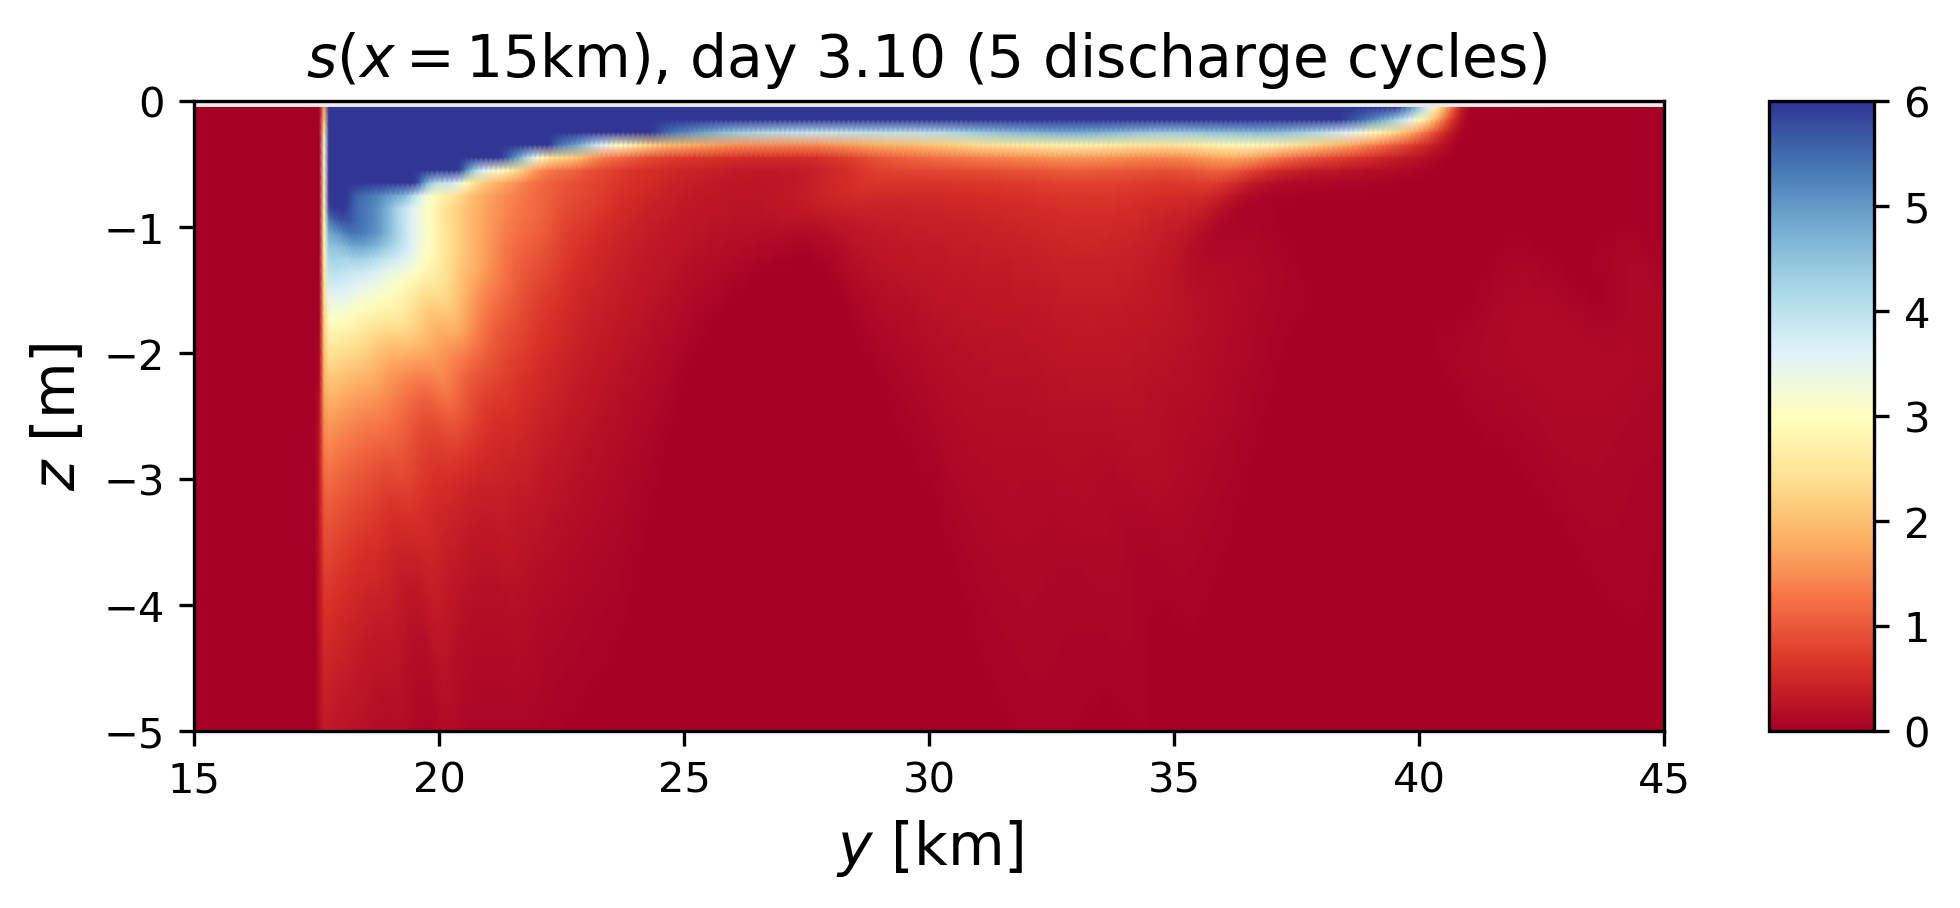

In [12]:
#Plotting salinity transect
index = 149
Salt = Saltf.variables['S'][index,:,:,:]
mask = Saltf.variables['S'][30,:,:,:]
Salt[mask==0]=np.nan
Salt[Salt>=34]=34
Salt.shape
fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

#quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='cubehelix_r',vmin=12.,vmax=34.,shading='gouraud')

quad1 = ax1.pcolormesh(yq/1000,zl,abs(Salt[:,:,150]-34.),cmap='RdYlBu',vmin=0.,vmax=6.,shading='gouraud')
#quad1.cmap.set_over('')
ax1.set_ylim(-5,0)
ax1.set_xlim(15,45)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='silver')

ax1.set_title('$s(x=15$km), day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$y$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

/nbhome/eay/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


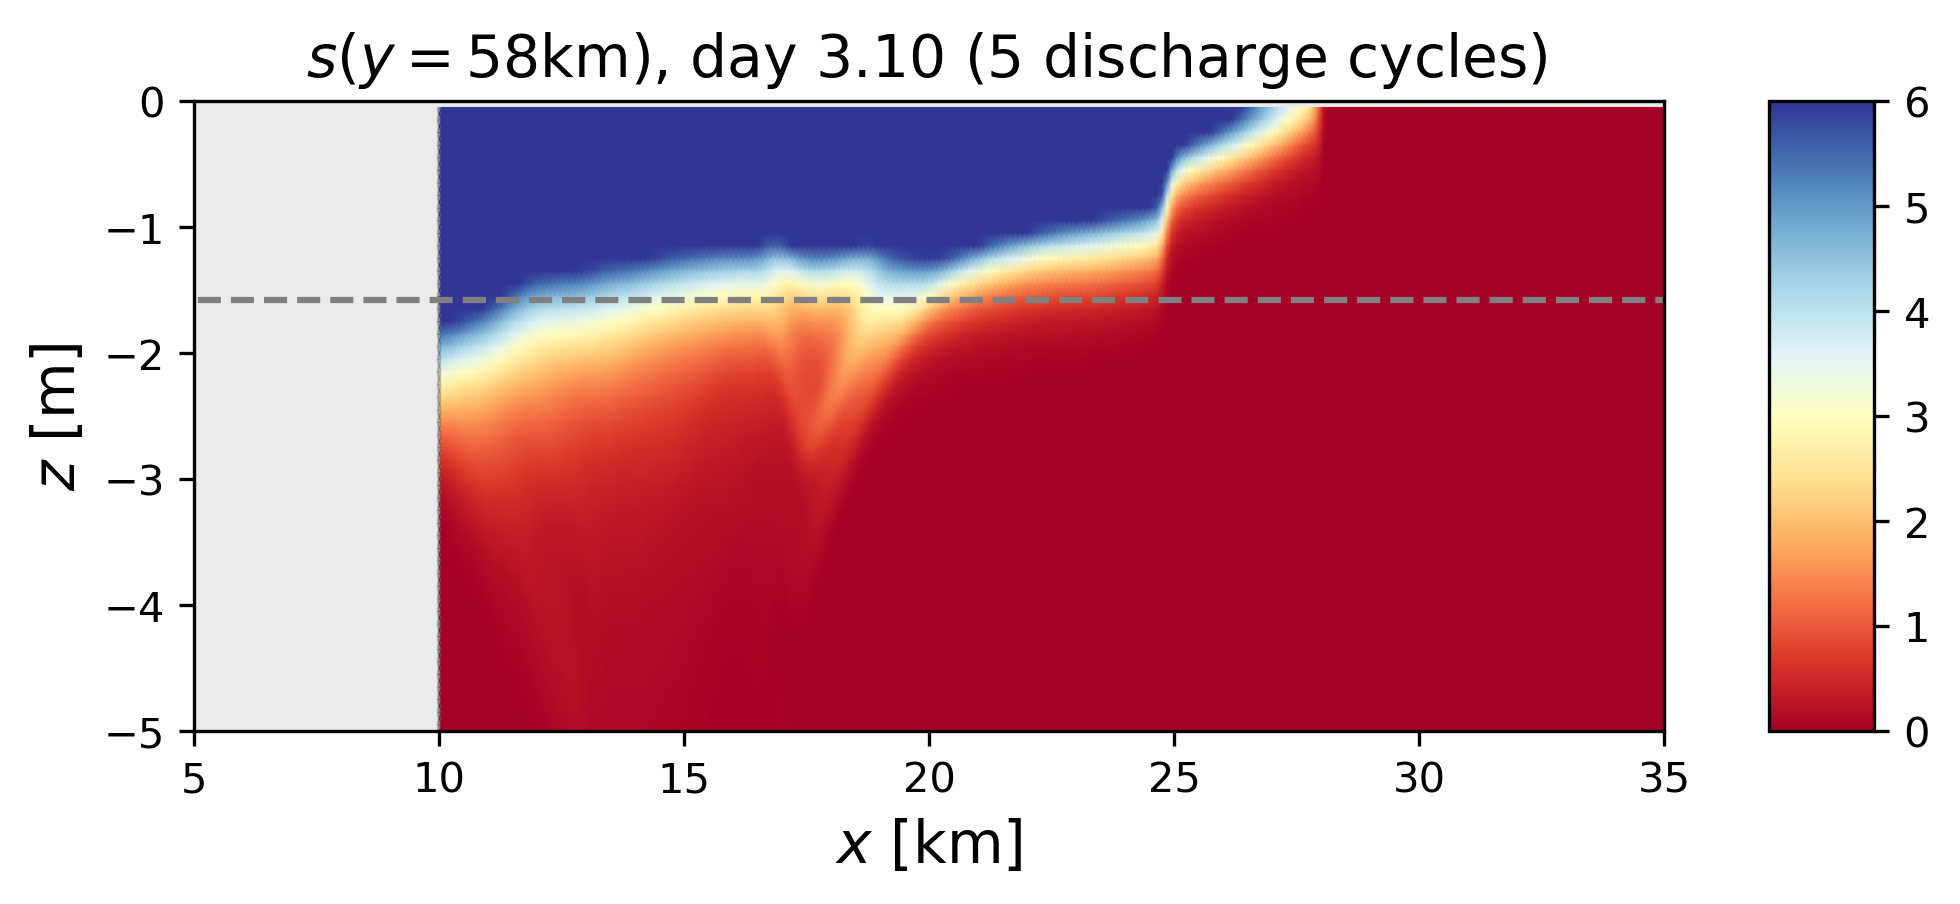

In [26]:
#Plotting salinity transect
index = 149
Salt = Saltf.variables['S'][index,:,:,:]
mask = Saltf.variables['S'][30,:,:,:]
Salt[mask==0]=np.nan
Salt[Salt>=34]=34
Salt.shape
ekman_depth = (2*1e-4/(8e-5))**0.5
fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

#quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='cubehelix_r',vmin=12.,vmax=34.,shading='gouraud')

quad1 = ax1.pcolormesh(xq/1000,zl,abs(Salt[:,580,:]-34.),cmap='RdYlBu',vmin=0.,vmax=6.,shading='gouraud')
ax1.plot([0,60],[-ekman_depth,-ekman_depth],'--',color=[.5,.5,.5])
#quad1.cmap.set_over('')
ax1.set_ylim(-5,0)
ax1.set_xlim(5,35)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='silver')

ax1.set_title('$s(y=58$km), day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

/nbhome/eay/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


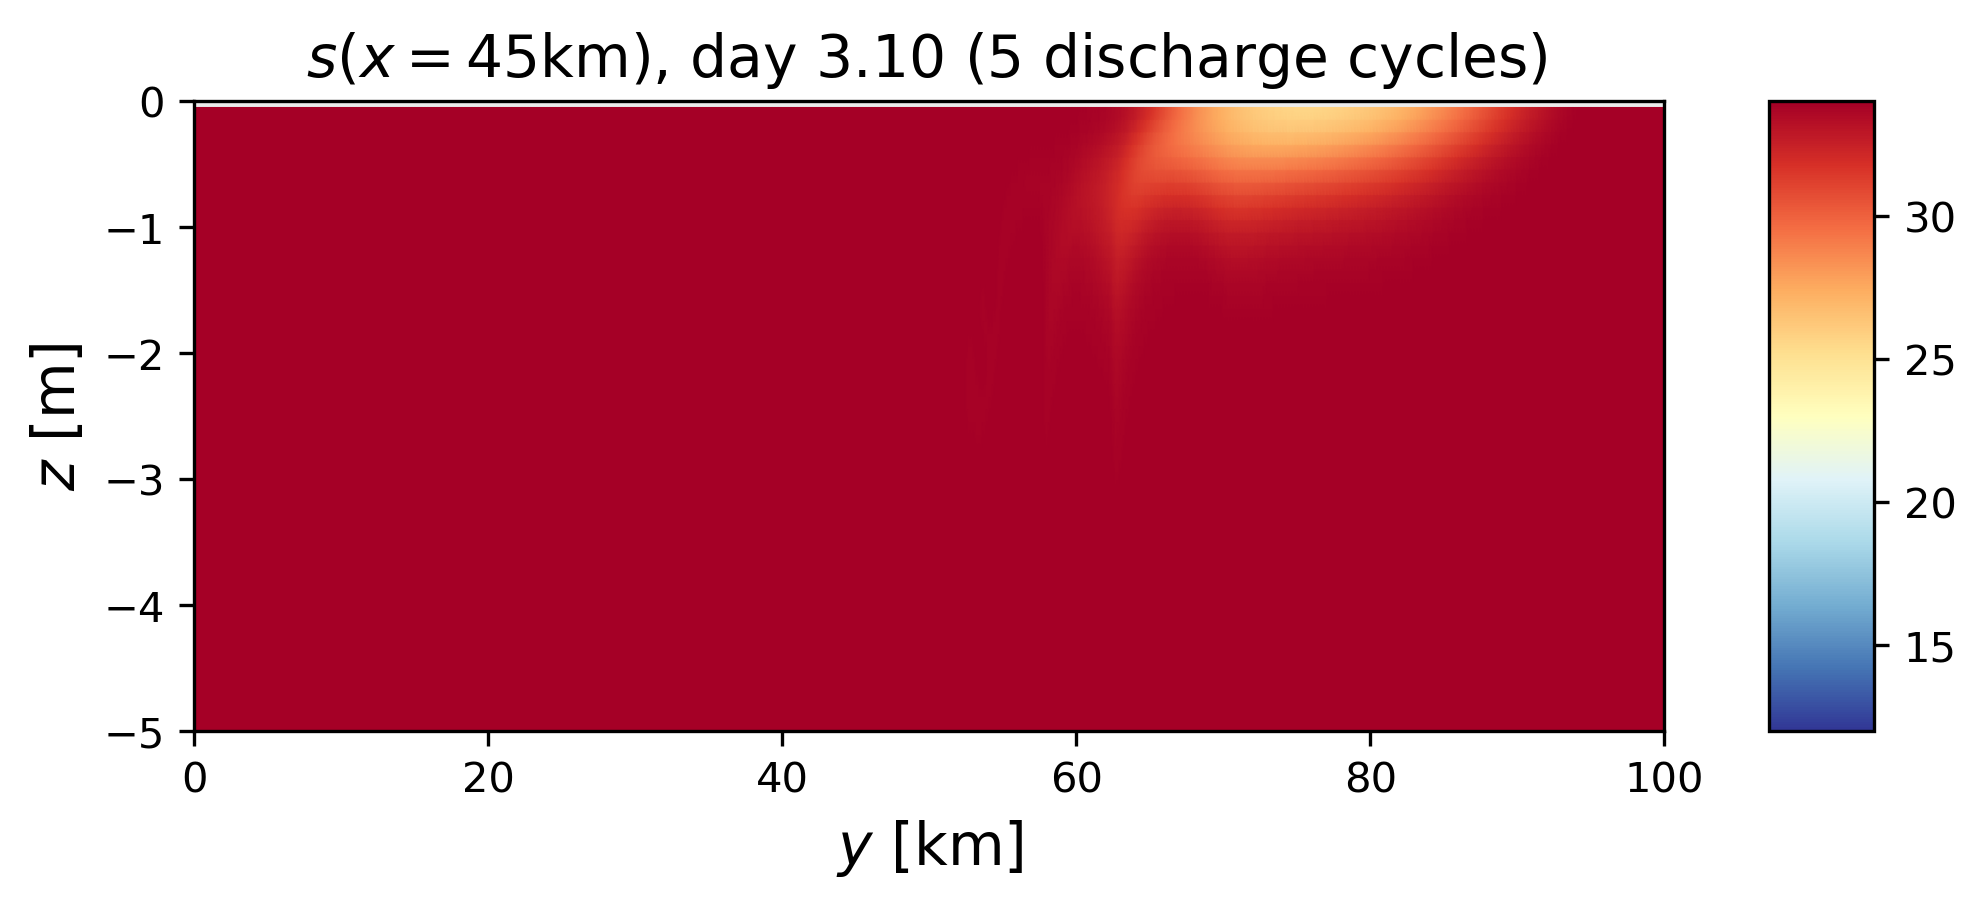

In [62]:
#Plotting salinity transect
index = 149
Salt = Saltf.variables['S'][index,:,:,:]
mask = Saltf.variables['S'][30,:,:,:]
Salt[mask==0]=np.nan
Salt[Salt>=34]=34
Salt.shape
fig = plt.figure(figsize=(7, 3), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

#quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='cubehelix_r',vmin=12.,vmax=34.,shading='gouraud')

quad1 = ax1.pcolormesh(yq/1000,zl,Salt[:,:,450],cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
#quad1.cmap.set_over('')
ax1.set_ylim(-5,0)
ax1.set_xlim(0,100)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='silver')

ax1.set_title('$s(x=45$km), day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
#ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$y$ [km]',fontsize=14)
ax1.set_ylabel('$z$ [m]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

In [5]:
index=149
xg7, yg7 = np.meshgrid(xq7, yq7)
u7 = U7.variables['U'][index,0,:,:-1]; v7 = V7.variables['V'][index,0,:-1,:];
S7 = Salt7.variables['S'][index,0,:,:]
mask7 = Salt7.variables['S'][0,0,:,:]; S7[mask7==0]=1e10;

xg17, yg17 = np.meshgrid(xq17, yq17)
u17 = U17.variables['U'][index,0,:,:-1]; v17 = V17.variables['V'][index,0,:-1,:];
S17 = Salt17.variables['S'][index,0,:,:]
mask17 = Salt17.variables['S'][0,0,:,:]; S17[mask17==0]=1e10;

xg18, yg18 = np.meshgrid(xq18, yq18)
u18 = U18.variables['U'][index,0,:,:-1]; v18 = V18.variables['V'][index,0,:-1,:];
S18 = Salt18.variables['S'][index,0,:,:]
mask18 = Salt18.variables['S'][0,0,:,:]; S18[mask18==0]=1e10;

skip=(slice(None,None,40),slice(None,None,40))

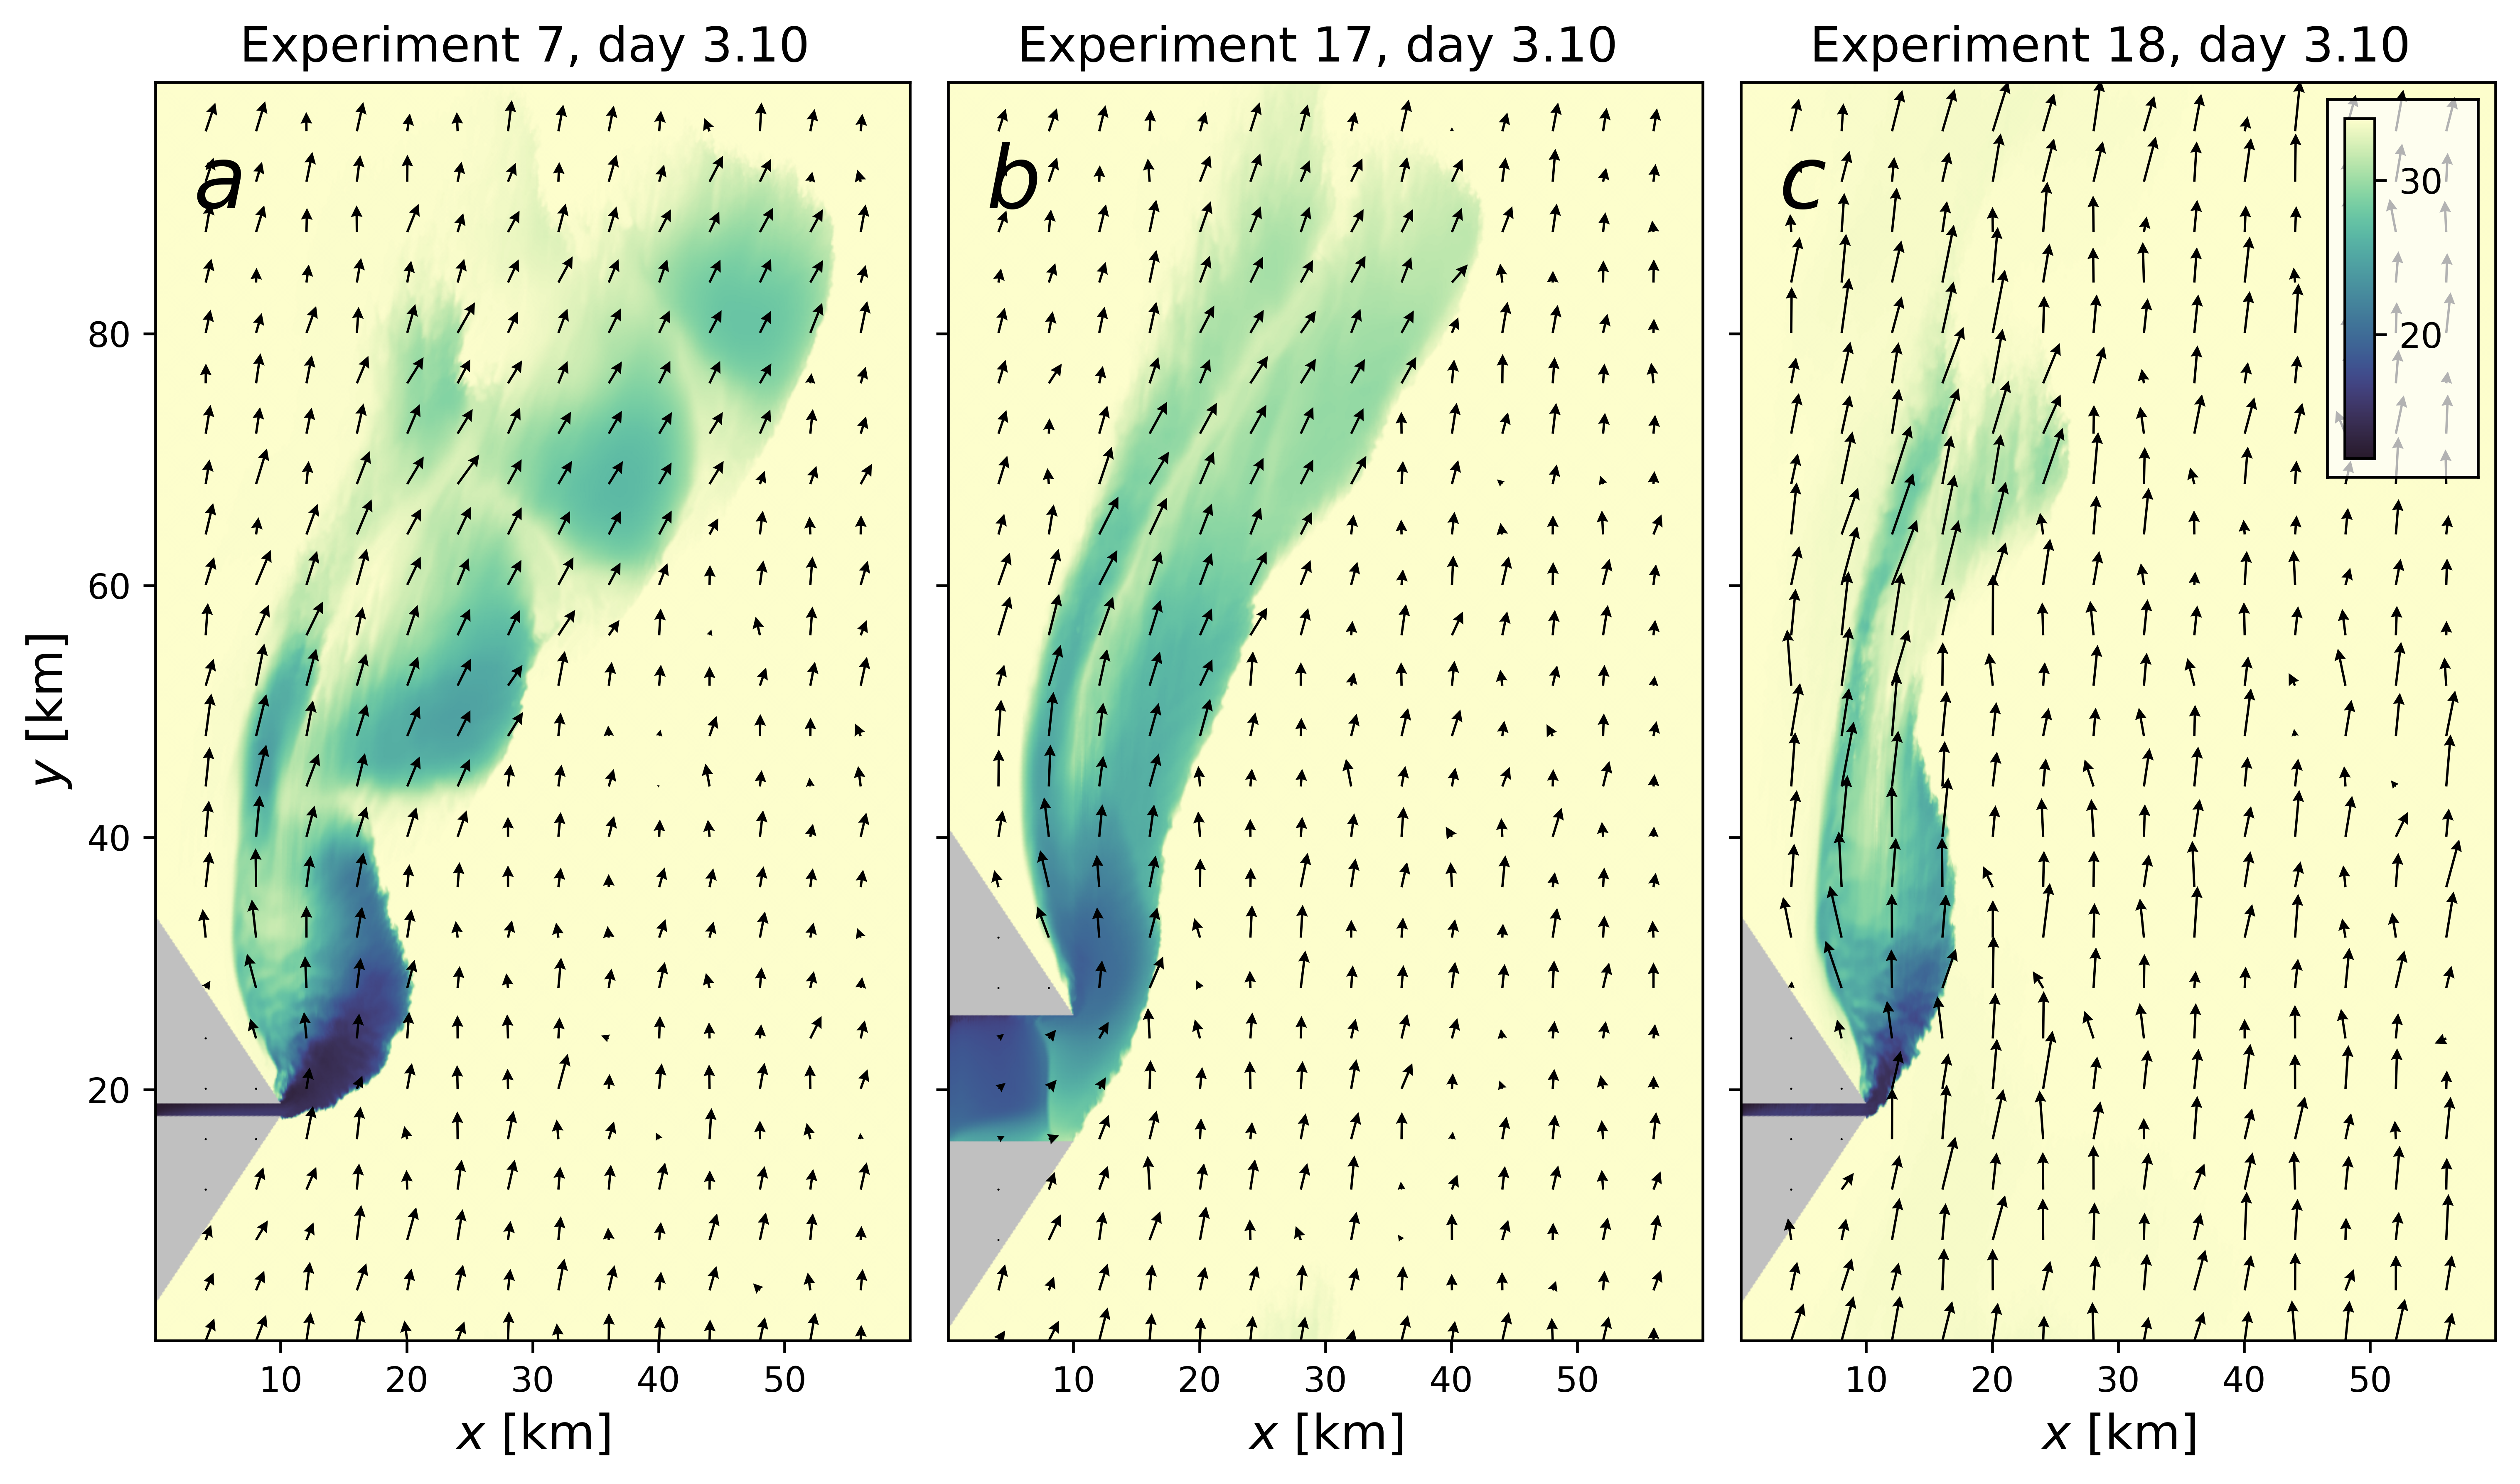

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10.6, 10), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.15,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.45,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.75,0.2,0.3,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
#ax4 = fig.add_axes([0.95,0.4,0.03,0.4])

#FIRST SUBPLOT
quad1 = ax1.pcolormesh(xq7/1000,yq7/1000,S7,cmap=cmocean.cm.deep_r,vmin=12.,vmax=34.,shading='gouraud')

Q1=ax1.quiver(xg7[skip]/1000,yg7[skip]/1000,u7[skip],v7[skip],headwidth=5,scale=None, scale_units='inches')
Q1._init()
assert isinstance(Q1.scale, float)

quad1.cmap.set_over('silver')
ax1.set_title('Experiment 7, day %04.2f ' %(index/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)
ax1.set_aspect('equal'); 
divider1 = make_axes_locatable(ax1); cax1 = divider1.new_vertical(size="5%", pad=0.7, pack_start=True)
ax1.text(0.05, 0.9, '$a$', transform=ax1.transAxes,fontsize=25)

quad2 = ax2.pcolormesh(xq17/1000,yq17/1000,S17,cmap=cmocean.cm.deep_r,vmin=12.,vmax=34.,shading='gouraud')
ax2.quiver(xg17[skip]/1000,yg17[skip]/1000,u17[skip],v17[skip],headwidth=5,scale=Q1.scale, scale_units='inches')
quad2.cmap.set_over('silver')
ax2.set_title('Experiment 17, day %04.2f ' %(index/48.), fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([''])
ax2.set_xlabel('$x$ [km]',fontsize=14)
ax2.set_aspect('equal');
divider2 = make_axes_locatable(ax2); cax2 = divider2.new_vertical(size="5%", pad=0.7, pack_start=True)
ax2.text(0.05, 0.9, '$b$',transform=ax2.transAxes,fontsize=25)

quad3 = ax3.pcolormesh(xq18/1000,yq18/1000,S18,cmap=cmocean.cm.deep_r,vmin=12.,vmax=34.,shading='gouraud')
quad3.cmap.set_over('silver')
ax3.quiver(xg18[skip]/1000,yg18[skip]/1000,u18[skip],v18[skip],headwidth=5,scale=Q1.scale, scale_units='inches')
ax3.set_title('Experiment 18, day %04.2f ' %(index/48.), fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
ax3.axes.set_yticklabels([''])
ax3.set_xlabel('$x$ [km]',fontsize=14)
ax3.set_aspect('equal'); 
divider3 = make_axes_locatable(ax3); cax3 = divider3.new_vertical(size="5%", pad=0.7, pack_start=True)
ax3.text(0.05, 0.9, '$c$',transform=ax3.transAxes,fontsize=25)


#Fancy colorbar!
cbbox = inset_axes(ax3, '20%', '30%', loc = 1)
cbbox.axes.set_yticklabels([''])
cbbox.axes.set_xticklabels([''])
cbbox.tick_params(left=False, right=False, bottom = False, top = False)
cbbox.set_facecolor([1,1,1,0.7])
cbaxes = inset_axes(cbbox, '20%', '90%', loc = 6)
fig.colorbar(quad3,cax=cbaxes) #make colorbar


In [7]:
S7.shape

(1000, 600)

### Plotting zonal depth cross sections (xz) 20km, 40 km, and 60 km north of the river mouth north edge. 

In [67]:
index=149
#time,depth, y, x.

#Experiment 7 the mouth top is at 19km: We need 39, 59, 79 km slices.
mask7 = Salt7.variables['S'][index,:,0,:]; 

v7_slice1 = V7.variables['V'][index,:,390,:]; v7_slice1[mask7==0]=np.nan
S7_slice1 = Salt7.variables['S'][index,:,390,:]
v7_slice2 = V7.variables['V'][index,:,590,:]; v7_slice2[mask7==0]=np.nan
S7_slice2 = Salt7.variables['S'][index,:,590,:]
v7_slice3 = V7.variables['V'][index,:,790,:]; v7_slice3[mask7==0]=np.nan
S7_slice3 = Salt7.variables['S'][index,:,790,:]



#Experiment 17 the mouth top is at 26km: We need 46, 66, 86 km slices.
mask17 = Salt17.variables['S'][index,:,0,:];

v17_slice1 = V17.variables['V'][index,:,460,:]; v17_slice1[mask17==0]=np.nan
S17_slice1 = Salt17.variables['S'][index,:,460,:]
v17_slice2 = V17.variables['V'][index,:,660,:]; v17_slice2[mask17==0]=np.nan
S17_slice2 = Salt17.variables['S'][index,:,660,:]
v17_slice3 = V17.variables['V'][index,:,860,:]; v17_slice3[mask17==0]=np.nan
S17_slice3 = Salt17.variables['S'][index,:,860,:]

#Experiment 18 the mouth top is at 19km: We need 39, 59, 79 km slices.
mask18 = Salt18.variables['S'][index,:,0,:];

v18_slice1 = V18.variables['V'][index,:,390,:]; v18_slice1[mask18==0]=np.nan
S18_slice1 = Salt18.variables['S'][index,:,390,:]
v18_slice2 = V18.variables['V'][index,:,590,:]; v18_slice2[mask18==0]=np.nan
S18_slice2 = Salt18.variables['S'][index,:,590,:]
v18_slice3 = V18.variables['V'][index,:,790,:]; v18_slice3[mask18==0]=np.nan
S18_slice3 = Salt18.variables['S'][index,:,790,:]


Text(0.3, 0.998, 'Experiment 7, day 3.10')

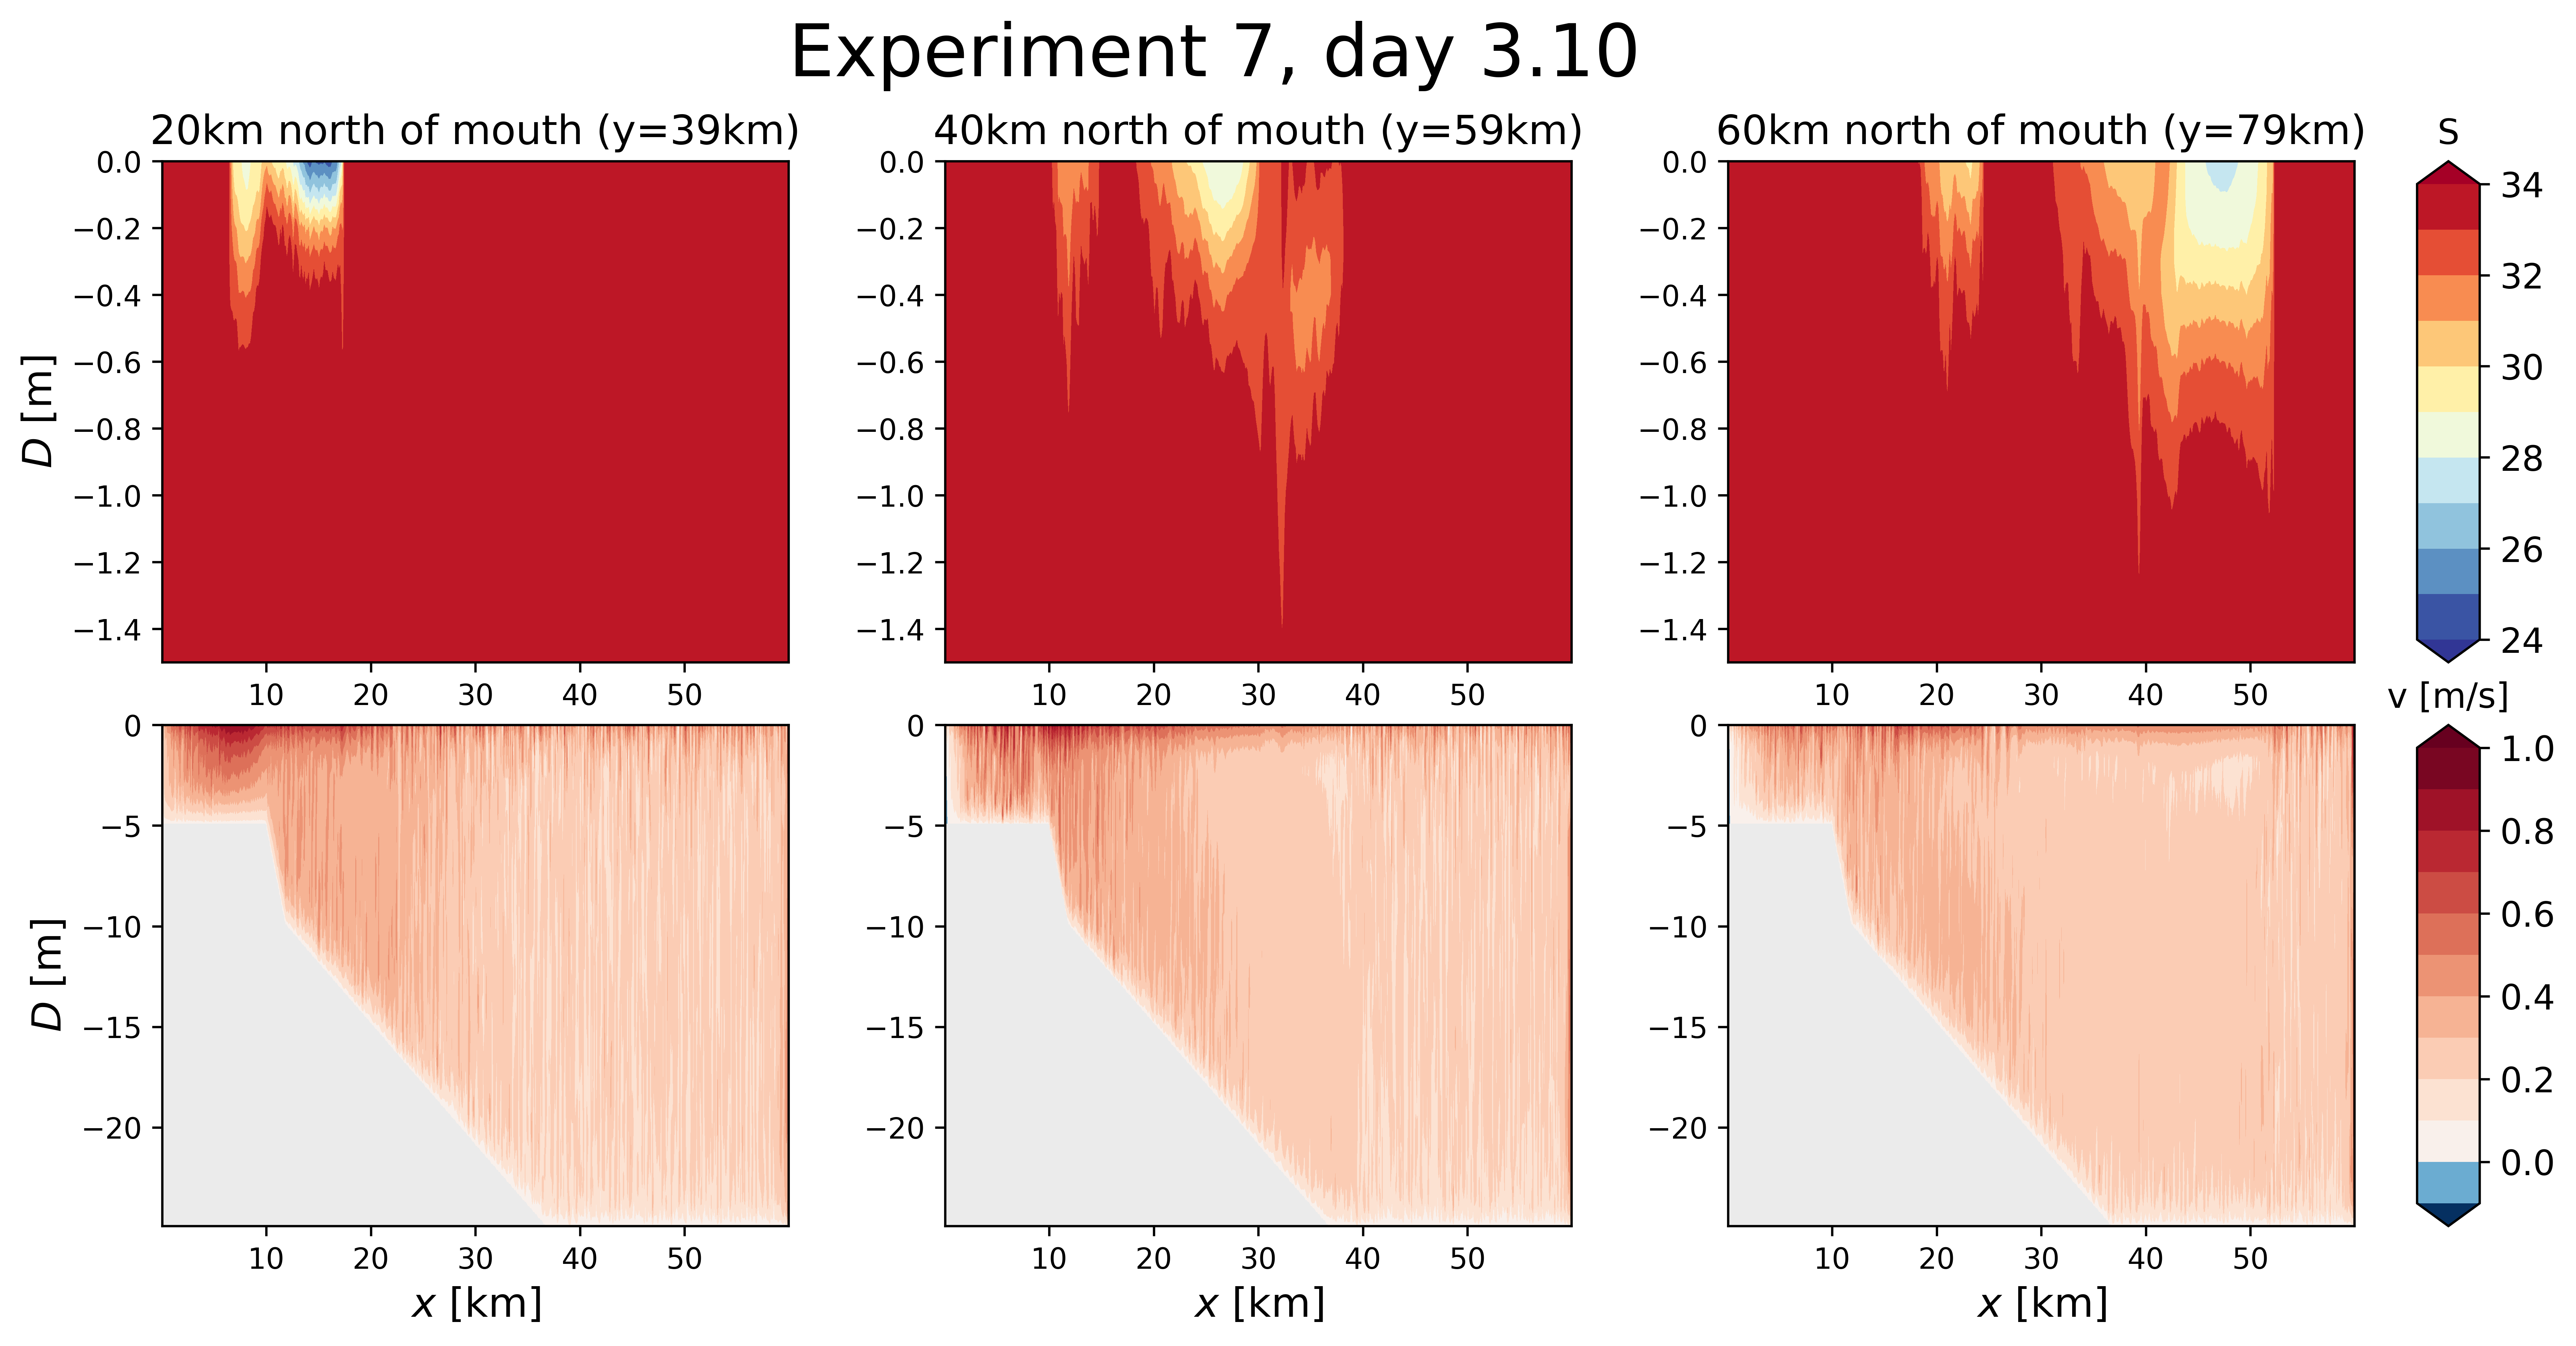

In [83]:
fig = plt.figure(figsize=(15, 6), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.1,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.35,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.6,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax4 = fig.add_axes([0.82,0.53,0.02,0.4])

ax5 = fig.add_axes([0.1,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax6 = fig.add_axes([0.35,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax7 = fig.add_axes([0.6,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax8 = fig.add_axes([0.82,0.08,0.02,0.4])

levels=np.linspace(24,34,11)
quad1 = ax1.contourf(xq7/1000,zl7+0.05,S7_slice1,cmap='RdYlBu_r',levels=levels,extend='both')
ax1.set_title('20km north of mouth (y=39km)', fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$D$ [m]',fontsize=14)
ax1.set_ylim([-1.5,0])


ax2.contourf(xq7/1000,zl7+0.05,S7_slice2,cmap='RdYlBu_r',levels=levels,extend='both')
ax2.set_title('40km north of mouth (y=59km)', fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
#ax2.set_xlabel('$x$ [km]',fontsize=14)
#ax2.set_ylabel('$D$ [m]',fontsize=14)
ax2.set_ylim([-1.5,0])

ax3.contourf(xq7/1000,zl7+0.05,S7_slice3,cmap='RdYlBu_r',levels=levels,extend='both')
ax3.set_title('60km north of mouth (y=79km)', fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
#ax3.set_xlabel('$x$ [km]',fontsize=14)
#ax3.set_ylabel('$D$ [m]',fontsize=14)
ax3.set_ylim([-1.5,0])

cbar = plt.colorbar(mappable = quad1, cax=ax4)
cbar.ax.tick_params(labelsize=12)
ax4.set_title('S') 

vlevels=np.linspace(-.1,1,12)
quad5 = ax5.contourf(xq7/1000,zl7+0.05,v7_slice1,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax5.set_facecolor((0.92, 0.92, 0.92))
ax5.set_xlabel('$x$ [km]',fontsize=14)
ax5.set_ylabel('$D$ [m]',fontsize=14)

ax6.contourf(xq7/1000,zl7+0.05,v7_slice2,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax6.set_facecolor((0.92, 0.92, 0.92))
ax6.set_xlabel('$x$ [km]',fontsize=14)
#ax6.set_ylabel('$D$ [m]',fontsize=14)

ax7.contourf(xq7/1000,zl7+0.05,v7_slice3,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax7.set_facecolor((0.92, 0.92, 0.92))
ax7.set_xlabel('$x$ [km]',fontsize=14)
#ax7.set_ylabel('$D$ [m]',fontsize=14)


cbar = plt.colorbar(mappable = quad5, cax=ax8)
cbar.ax.tick_params(labelsize=12)
ax8.set_title('v [m/s]') 

fig.text(0.3,0.998,'Experiment 7, day 3.10',fontsize=25)

Text(0.3, 0.998, 'Experiment 17, day 3.10')

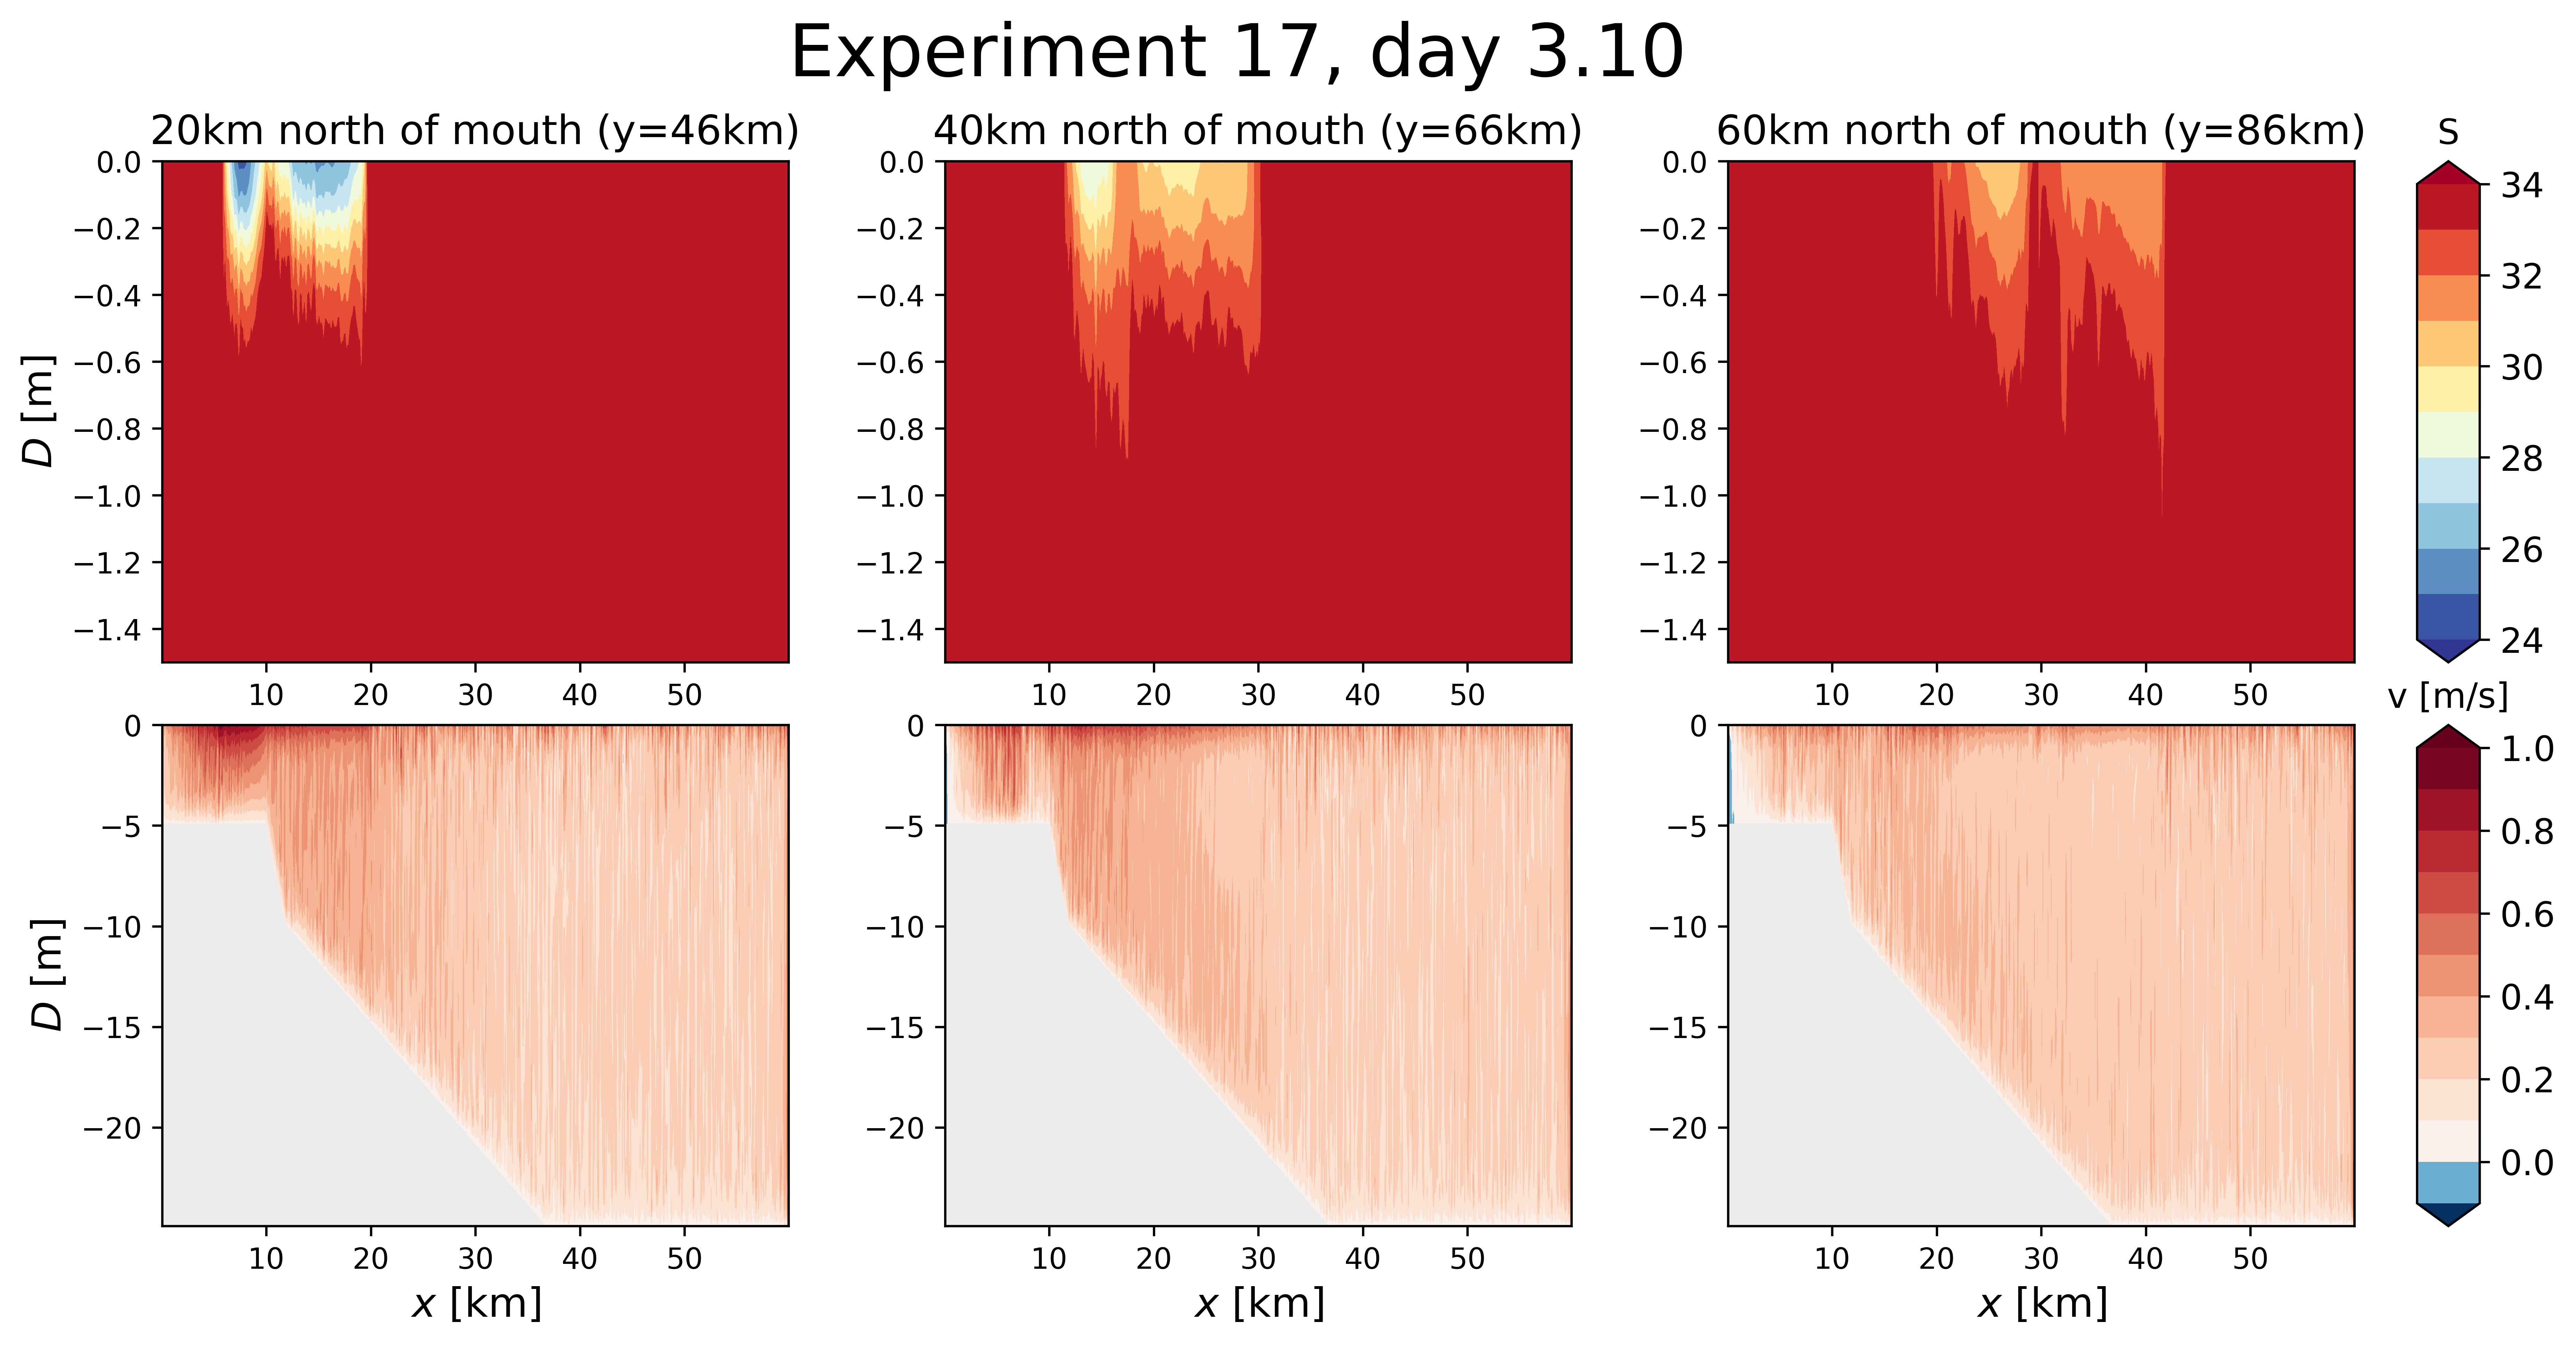

In [84]:
fig = plt.figure(figsize=(15, 6), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.1,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.35,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.6,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax4 = fig.add_axes([0.82,0.53,0.02,0.4])

ax5 = fig.add_axes([0.1,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax6 = fig.add_axes([0.35,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax7 = fig.add_axes([0.6,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax8 = fig.add_axes([0.82,0.08,0.02,0.4])

levels=np.linspace(24,34,11)
quad1 = ax1.contourf(xq17/1000,zl17+0.05,S17_slice1,cmap='RdYlBu_r',levels=levels,extend='both')
ax1.set_title('20km north of mouth (y=46km)', fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$D$ [m]',fontsize=14)
ax1.set_ylim([-1.5,0])


ax2.contourf(xq17/1000,zl17+0.05,S17_slice2,cmap='RdYlBu_r',levels=levels,extend='both')
ax2.set_title('40km north of mouth (y=66km)', fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
#ax2.set_xlabel('$x$ [km]',fontsize=14)
#ax2.set_ylabel('$D$ [m]',fontsize=14)
ax2.set_ylim([-1.5,0])

ax3.contourf(xq17/1000,zl17+0.05,S17_slice3,cmap='RdYlBu_r',levels=levels,extend='both')
ax3.set_title('60km north of mouth (y=86km)', fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
#ax3.set_xlabel('$x$ [km]',fontsize=14)
#ax3.set_ylabel('$D$ [m]',fontsize=14)
ax3.set_ylim([-1.5,0])

cbar = plt.colorbar(mappable = quad1, cax=ax4)
cbar.ax.tick_params(labelsize=12)
ax4.set_title('S') 

vlevels=np.linspace(-.1,1,12)
quad5 = ax5.contourf(xq17/1000,zl17+0.05,v17_slice1,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax5.set_facecolor((0.92, 0.92, 0.92))
ax5.set_xlabel('$x$ [km]',fontsize=14)
ax5.set_ylabel('$D$ [m]',fontsize=14)

ax6.contourf(xq17/1000,zl17+0.05,v17_slice2,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax6.set_facecolor((0.92, 0.92, 0.92))
ax6.set_xlabel('$x$ [km]',fontsize=14)
#ax6.set_ylabel('$D$ [m]',fontsize=14)

ax7.contourf(xq17/1000,zl17+0.05,v17_slice3,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax7.set_facecolor((0.92, 0.92, 0.92))
ax7.set_xlabel('$x$ [km]',fontsize=14)
#ax7.set_ylabel('$D$ [m]',fontsize=14)


cbar = plt.colorbar(mappable = quad5, cax=ax8)
cbar.ax.tick_params(labelsize=12)
ax8.set_title('v [m/s]') 

fig.text(0.3,0.998,'Experiment 17, day 3.10',fontsize=25)

Text(0.3, 0.998, 'Experiment 18, day 3.10')

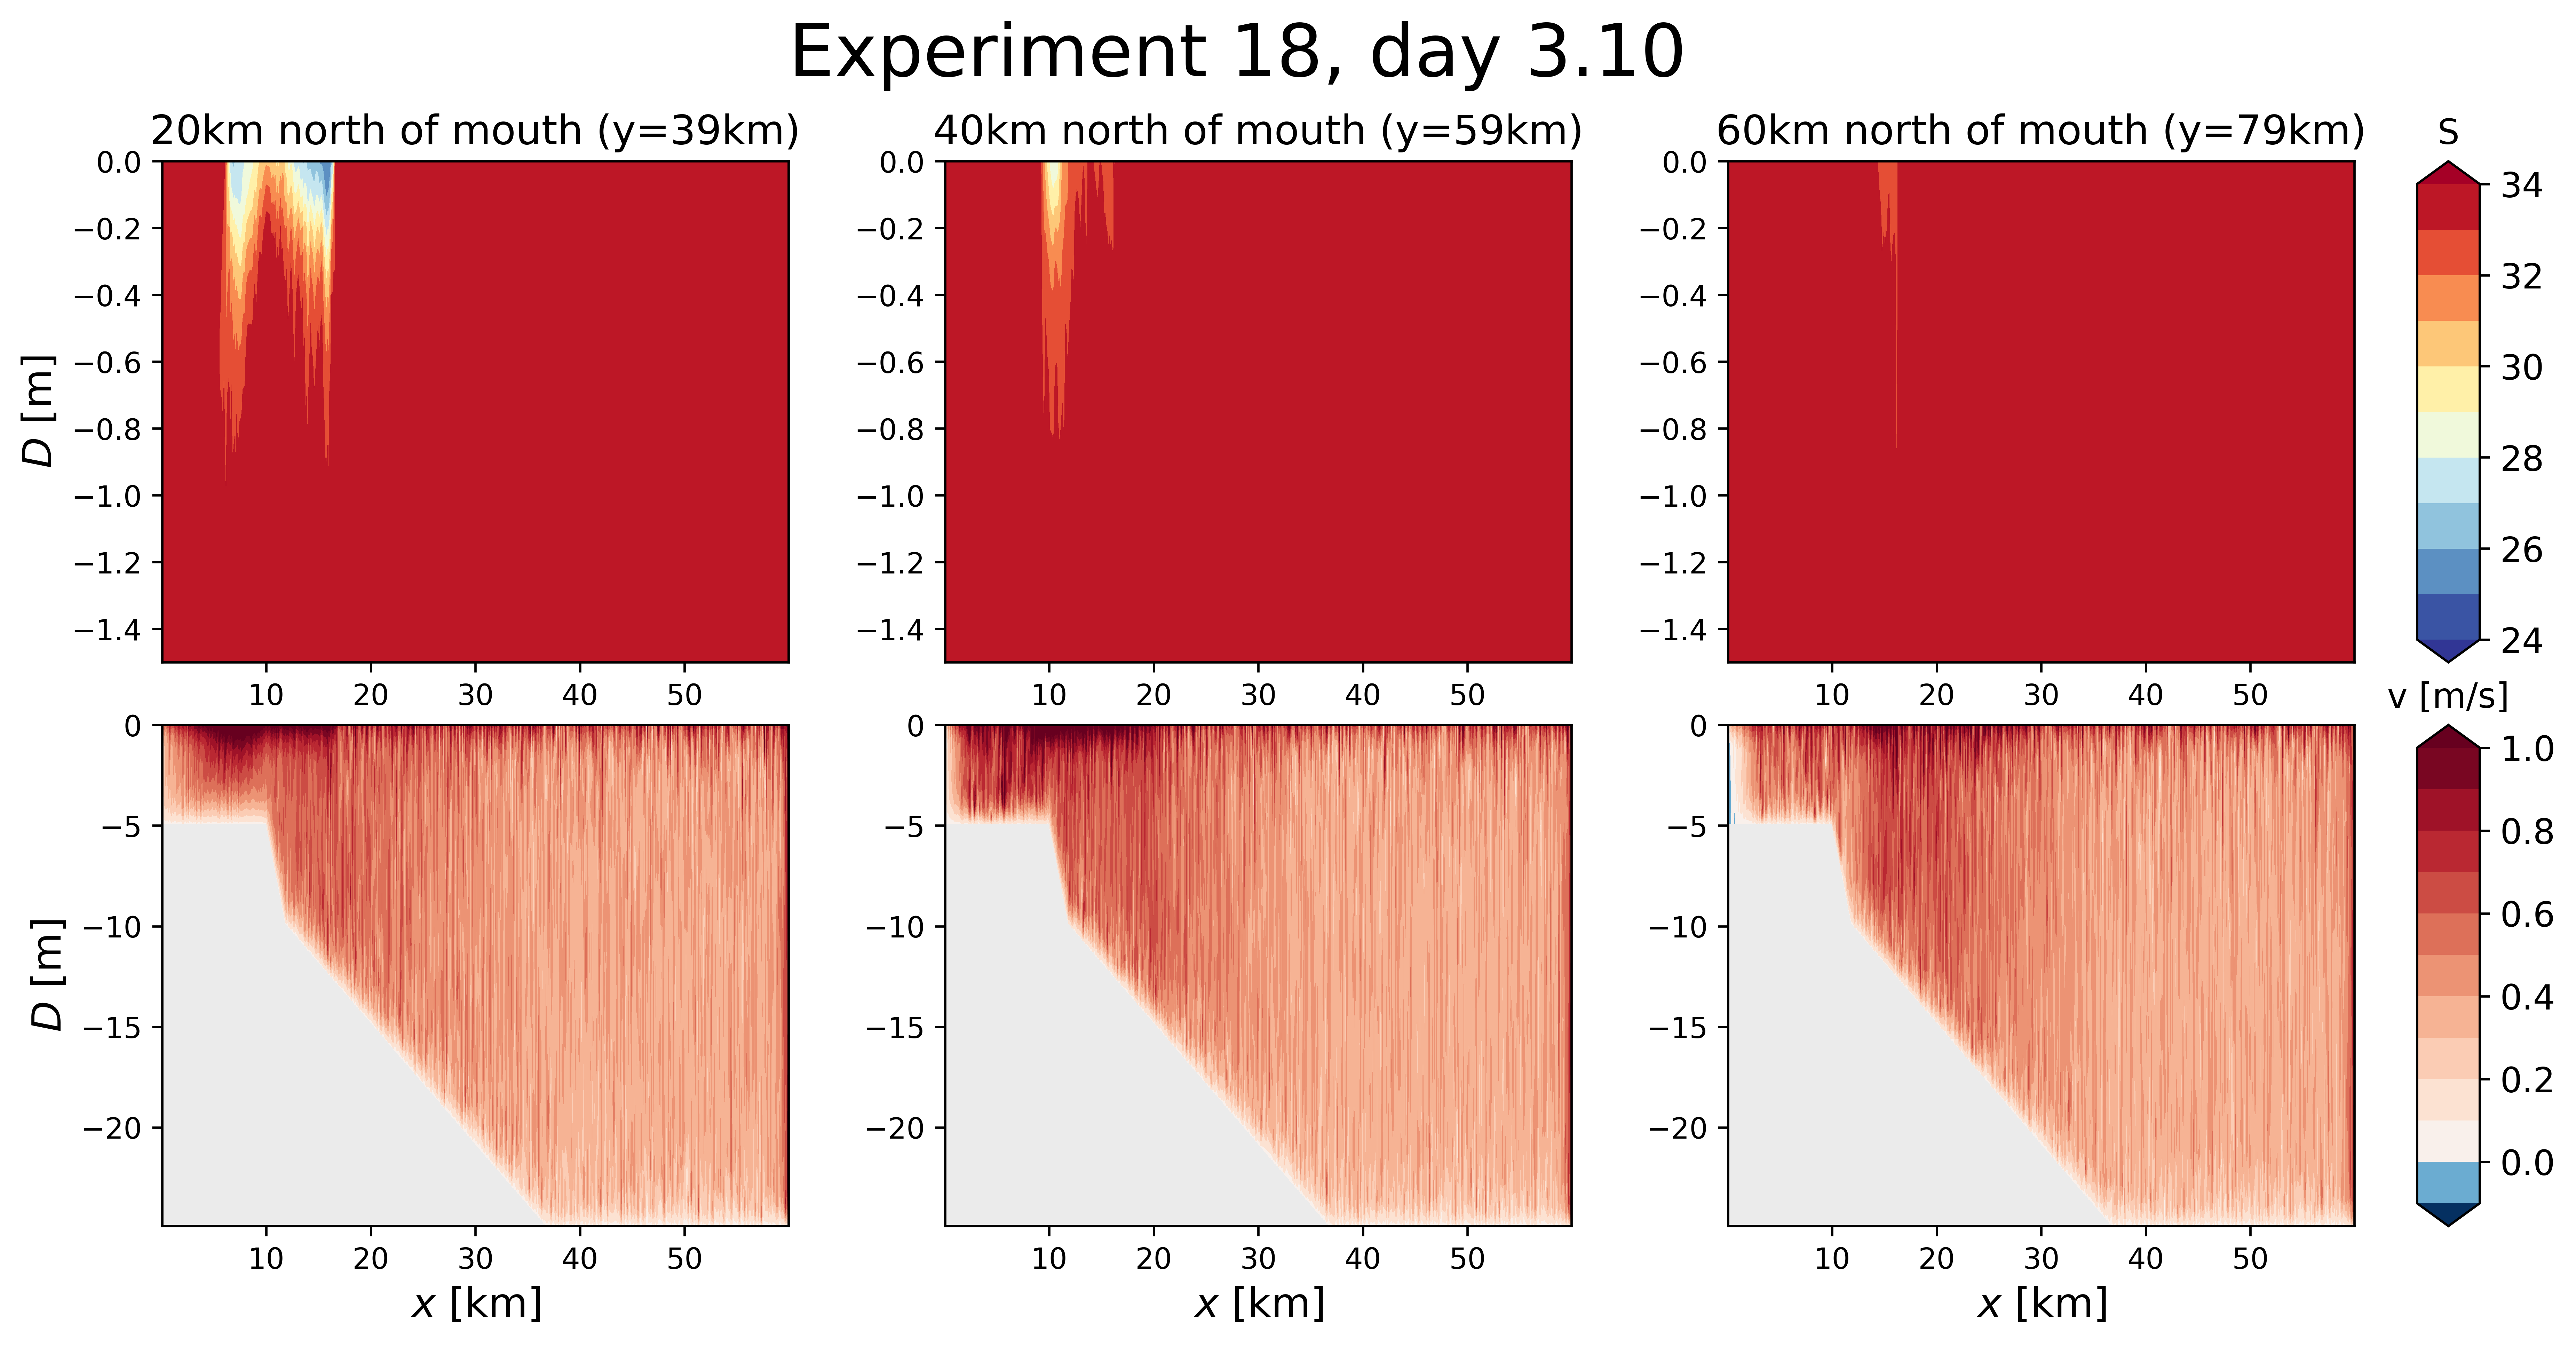

In [85]:
fig = plt.figure(figsize=(15, 6), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.1,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.35,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.6,0.53,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax4 = fig.add_axes([0.82,0.53,0.02,0.4])

ax5 = fig.add_axes([0.1,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax6 = fig.add_axes([0.35,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax7 = fig.add_axes([0.6,0.08,0.2,0.4])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax8 = fig.add_axes([0.82,0.08,0.02,0.4])

levels=np.linspace(24,34,11)
quad1 = ax1.contourf(xq18/1000,zl18+0.05,S18_slice1,cmap='RdYlBu_r',levels=levels,extend='both')
ax1.set_title('20km north of mouth (y=39km)', fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$D$ [m]',fontsize=14)
ax1.set_ylim([-1.5,0])


ax2.contourf(xq18/1000,zl18+0.05,S18_slice2,cmap='RdYlBu_r',levels=levels,extend='both')
ax2.set_title('40km north of mouth (y=59km)', fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
#ax2.set_xlabel('$x$ [km]',fontsize=14)
#ax2.set_ylabel('$D$ [m]',fontsize=14)
ax2.set_ylim([-1.5,0])

ax3.contourf(xq18/1000,zl18+0.05,S18_slice3,cmap='RdYlBu_r',levels=levels,extend='both')
ax3.set_title('60km north of mouth (y=79km)', fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
#ax3.set_xlabel('$x$ [km]',fontsize=14)
#ax3.set_ylabel('$D$ [m]',fontsize=14)
ax3.set_ylim([-1.5,0])

cbar = plt.colorbar(mappable = quad1, cax=ax4)
cbar.ax.tick_params(labelsize=12)
ax4.set_title('S') 

vlevels=np.linspace(-.1,1,12)
quad5 = ax5.contourf(xq18/1000,zl18+0.05,v18_slice1,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax5.set_facecolor((0.92, 0.92, 0.92))
ax5.set_xlabel('$x$ [km]',fontsize=14)
ax5.set_ylabel('$D$ [m]',fontsize=14)

ax6.contourf(xq18/1000,zl18+0.05,v18_slice2,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax6.set_facecolor((0.92, 0.92, 0.92))
ax6.set_xlabel('$x$ [km]',fontsize=14)
#ax6.set_ylabel('$D$ [m]',fontsize=14)

ax7.contourf(xq18/1000,zl18+0.05,v18_slice3,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',levels=vlevels,extend='both')
ax7.set_facecolor((0.92, 0.92, 0.92))
ax7.set_xlabel('$x$ [km]',fontsize=14)
#ax7.set_ylabel('$D$ [m]',fontsize=14)


cbar = plt.colorbar(mappable = quad5, cax=ax8)
cbar.ax.tick_params(labelsize=12)
ax8.set_title('v [m/s]') 

fig.text(0.3,0.998,'Experiment 18, day 3.10',fontsize=25)